In [1]:
#Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Data
data=pd.read_csv('D:/SEMESTER 6/DATA MINING/PROJECT EAS/rain_in_australia (1).csv', sep=';')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/01/2009,Adelaide,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71,22,1007.7,1007.1,16.9,21.8,No,No
1,01/01/2009,Brisbane,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44,25,1010.6,1007.8,17.2,24.3,No,No
2,01/01/2009,Canberra,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38,30,1007.6,1008.7,21.0,23.2,No,No
3,01/01/2009,Sydney,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45,16,1017.6,1012.8,18.1,26.5,No,No
4,01/01/2009,Melbourne,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82,33,1010.8,1006.0,17.8,29.7,No,No


In [3]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
545,19/04/2009,Adelaide,8.8,20.2,5.8,SE,46.0,SSW,SSE,11.0,31.0,99,47,1004.7,1004.8,10.8,19.6,Yes,No
546,19/04/2009,Brisbane,10.7,19.1,0.0,SSE,48.0,SSE,SE,19.0,15.0,54,48,1015.2,1014.8,15.0,18.4,No,No
547,19/04/2009,Canberra,4.2,16.6,0.0,SE,13.0,NaN,SE,0.0,7.0,89,58,1020.7,1018.5,8.3,16.1,No,No
548,19/04/2009,Sydney,4.3,17.7,0.0,W,13.0,NaN,SSW,0.0,4.0,93,60,1022.3,1020.6,8.6,16.8,No,No
549,19/04/2009,Melbourne,3.4,17.7,0.0,SSE,17.0,NaN,SE,0.0,7.0,79,50,1026.5,1023.5,8.9,17.2,No,No


In [4]:
#Cek Tipe Data
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
#Cek Missing Value
data.isnull().sum(axis=0)

Date              0
Location          0
MinTemp           4
MaxTemp           5
Rainfall          8
WindGustDir       3
WindGustSpeed    11
WindDir9am       33
WindDir3pm        1
WindSpeed9am      3
WindSpeed3pm      3
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Temp9am           0
Temp3pm           0
RainToday         2
RainTomorrow      2
dtype: int64

In [6]:
#persentase missing value
def Missing_Value(data):
    total = data.isnull().sum().sort_values(ascending = False)
    persentase = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_value = pd.concat([total, persentase], axis=1, keys=['Total', 'Persentase'])
    missing_value = missing_value[missing_value['Persentase'] > 0]
    plt.figure(figsize = (8, 4))
    plt.xticks(rotation='90')
    sns.barplot(missing_value.index, missing_value['Persentase'],color='red',alpha=0.8)
    plt.xlabel('Variabel', fontsize=10)
    plt.ylabel('Persentase Missing Value', fontsize=10)
    plt.title('Persentase Missing Value Setiap Variabel', fontsize=10)
    return missing_value

def Value_Counts(dataset, variables):
    for variable in variables:
        value_counts = dataset[variable].Value_Counts()
        print(value_counts)
        print('-'*30)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Persentase
WindDir9am,33,6.000000
WindGustSpeed,11,2.000000
Rainfall,8,1.454545
MaxTemp,5,0.909091
MinTemp,4,0.727273
WindSpeed9am,3,0.545455
WindGustDir,3,0.545455
WindSpeed3pm,3,0.545455
RainToday,2,0.363636
RainTomorrow,2,0.363636


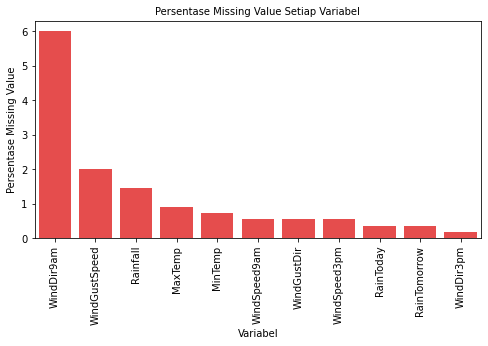

In [7]:
# persentase missing value
Missing_Value(data)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


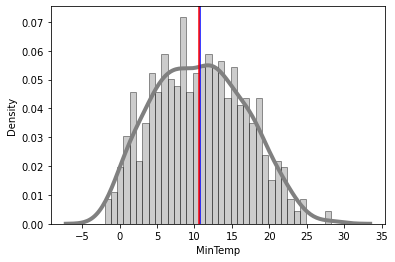

In [8]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Temperature Minimal
sns.distplot(data['MinTemp'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['MinTemp'].mean(),color='blue') 
plt.axvline(data['MinTemp'].median(),color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


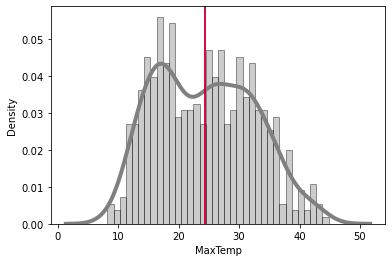

In [9]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Temperature Maximal
sns.distplot(data['MaxTemp'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['MaxTemp'].mean(),color='blue') 
plt.axvline(data['MaxTemp'].median(),color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


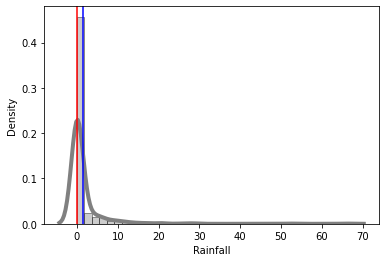

In [10]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Rainfall
sns.distplot(data['Rainfall'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['Rainfall'].mean(),color='blue') 
plt.axvline(data['Rainfall'].median(),color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


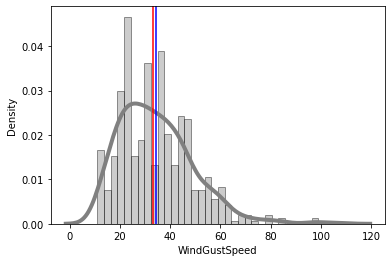

In [11]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Kecepatan Angin
sns.distplot(data['WindGustSpeed'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['WindGustSpeed'].mean(),color='blue') 
plt.axvline(data['WindGustSpeed'].median(),color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


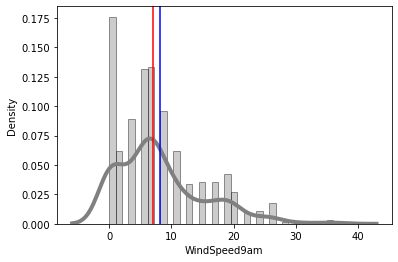

In [12]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Kecepatan Angin pada Pukul 9 Pagi
sns.distplot(data['WindSpeed9am'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['WindSpeed9am'].mean(),color='blue') 
plt.axvline(data['WindSpeed9am'].median(),color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


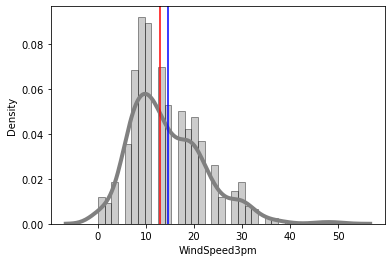

In [13]:
#Cek median/mean yang dapat digunakan untuk imputasi missing value variabel Kecepatan Angin pada Pukul 3 Sore
sns.distplot(data['WindSpeed3pm'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['WindSpeed3pm'].mean(),color='blue') 
plt.axvline(data['WindSpeed3pm'].median(),color='red')

In [14]:
#Cek Modus Variabel WindGustDir
data['WindGustDir'].mode()

0    W
dtype: object

In [15]:
#Cek Modus Variabel WindDir9am
data['WindDir9am'].mode()

0    SE
dtype: object

In [16]:
#Cek Modus Variabel WindDir3pm
data['WindDir3pm'].mode()

0    WNW
dtype: object

In [17]:
#Cek Modus Variabel RainToday
data['RainToday'].mode()

0    No
dtype: object

In [18]:
#Cek Modus Variabel RainTomorrow
data['RainTomorrow'].mode()

0    No
dtype: object

In [19]:
#Imputasi Missing Value
data.MinTemp=data.MinTemp.fillna(data.MinTemp.median())
data.MaxTemp=data.MaxTemp.fillna(data.MaxTemp.mean())
data.Rainfall=data.Rainfall.fillna(data.Rainfall.median())
data.WindGustSpeed=data.WindGustSpeed.fillna(data.WindGustSpeed.median())
data.WindSpeed9am=data.WindSpeed9am.fillna(data.WindSpeed9am.median())
data.WindSpeed3pm=data.WindSpeed3pm.fillna(data.WindSpeed3pm.median())
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [20]:
#Cek Missing Value
data.isnull().sum(axis=0)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [21]:
#Melihat Deskripsi Data
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,10.700727,24.342385,1.510182,34.440000,8.152727,14.567273,68.421818,41.960000,1017.079636,1014.311455,15.480545,23.139455
std,6.065994,8.057992,5.021601,14.592929,6.978130,7.820273,18.419032,20.474744,6.809464,6.649226,6.421030,7.838975
min,-2.000000,8.200000,0.000000,11.000000,0.000000,0.000000,20.000000,7.000000,994.300000,993.000000,1.900000,7.300000
25%,5.900000,17.400000,0.000000,24.000000,4.000000,9.000000,52.000000,25.000000,1011.800000,1009.125000,10.100000,16.525000
50%,10.600000,24.342385,0.000000,33.000000,7.000000,13.000000,71.000000,40.000000,1017.350000,1014.450000,15.450000,23.100000
75%,15.175000,30.600000,0.200000,43.000000,11.000000,19.000000,83.000000,56.000000,1022.275000,1019.300000,20.375000,29.300000
max,28.300000,44.800000,66.000000,107.000000,37.000000,50.000000,99.000000,99.000000,1036.300000,1033.600000,34.500000,43.400000


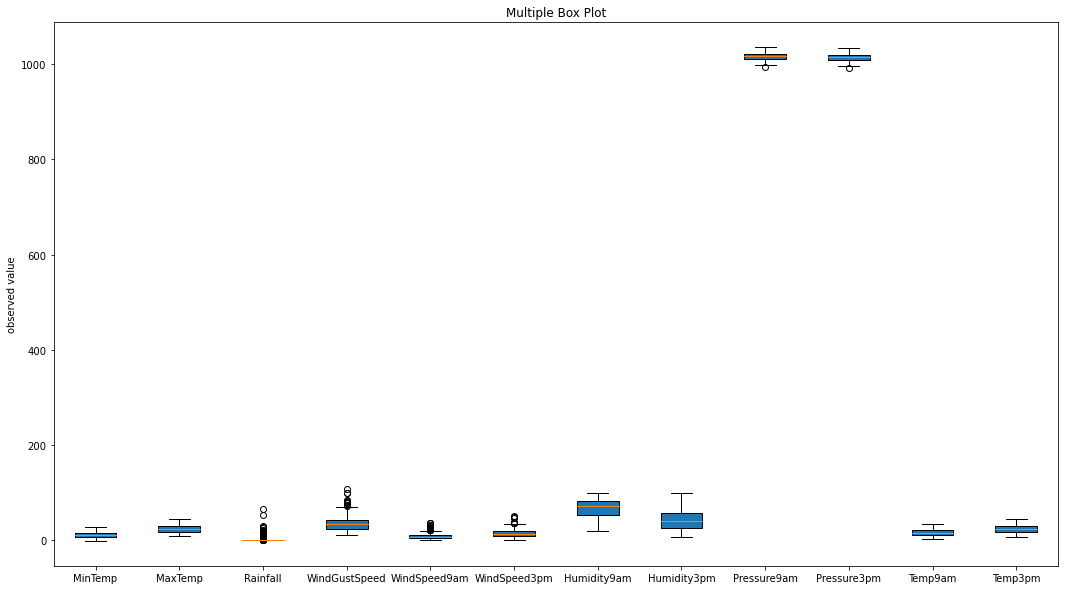

In [22]:
#MultipleBoxplot
dt = [data['MinTemp'],data['MaxTemp'],data['Rainfall'],data['WindGustSpeed'],data['WindSpeed9am'],data['WindSpeed3pm'],data['Humidity9am'],data['Humidity3pm'],data['Pressure9am'],data['Pressure3pm'],data['Temp9am'],data['Temp3pm']]
label = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
fig = plt.figure(figsize =(18, 10))
 
plt.boxplot(dt, vert=True, patch_artist=True, labels=label) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot')
plt.show()

In [23]:
#Melihat Korelasi antar Variabel
corr=data.corr()
corr

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.814005,0.079753,0.455270,0.281445,0.276884,-0.607354,-0.439697,-0.451075,-0.476001,0.936129,0.794074
MaxTemp,0.814005,1.000000,-0.148388,0.309826,0.023593,0.165545,-0.773893,-0.781234,-0.235273,-0.314805,0.918893,0.988087
Rainfall,0.079753,-0.148388,1.000000,0.183207,0.152863,0.167798,0.226013,0.262294,-0.284314,-0.220806,-0.027197,-0.150850
WindGustSpeed,0.455270,0.309826,0.183207,1.000000,0.484873,0.708094,-0.351271,-0.176813,-0.622922,-0.629135,0.419716,0.269657
WindSpeed9am,0.281445,0.023593,0.152863,0.484873,1.000000,0.440674,-0.276042,0.018312,-0.496722,-0.430841,0.215173,-0.004729
WindSpeed3pm,0.276884,0.165545,0.167798,0.708094,0.440674,1.000000,-0.229652,-0.137621,-0.540291,-0.510583,0.256169,0.136243
Humidity9am,-0.607354,-0.773893,0.226013,-0.351271,-0.276042,-0.229652,1.000000,0.775792,0.267802,0.301143,-0.764886,-0.756977
Humidity3pm,-0.439697,-0.781234,0.262294,-0.176813,0.018312,-0.137621,0.775792,1.000000,0.044129,0.094330,-0.602615,-0.812200
Pressure9am,-0.451075,-0.235273,-0.284314,-0.622922,-0.496722,-0.540291,0.267802,0.044129,1.000000,0.966971,-0.397232,-0.197537
Pressure3pm,-0.476001,-0.314805,-0.220806,-0.629135,-0.430841,-0.510583,0.301143,0.094330,0.966971,1.000000,-0.445495,-0.282004


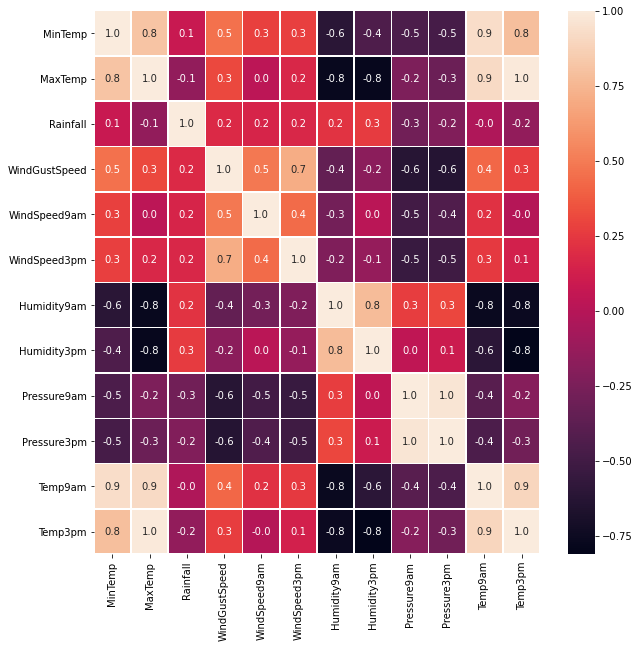

In [24]:
#Visualisasi Korelasi antar Variabel
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True, linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

In [25]:
#data baru (prediktor)
all_col=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',
         'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
datab=data[all_col]
datab

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71,22,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44,25,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38,30,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45,16,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82,33,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
545,8.8,20.2,5.8,46.0,11.0,31.0,99,47,1004.7,1004.8,10.8,19.6
546,10.7,19.1,0.0,48.0,19.0,15.0,54,48,1015.2,1014.8,15.0,18.4
547,4.2,16.6,0.0,13.0,0.0,7.0,89,58,1020.7,1018.5,8.3,16.1
548,4.3,17.7,0.0,13.0,0.0,4.0,93,60,1022.3,1020.6,8.6,16.8


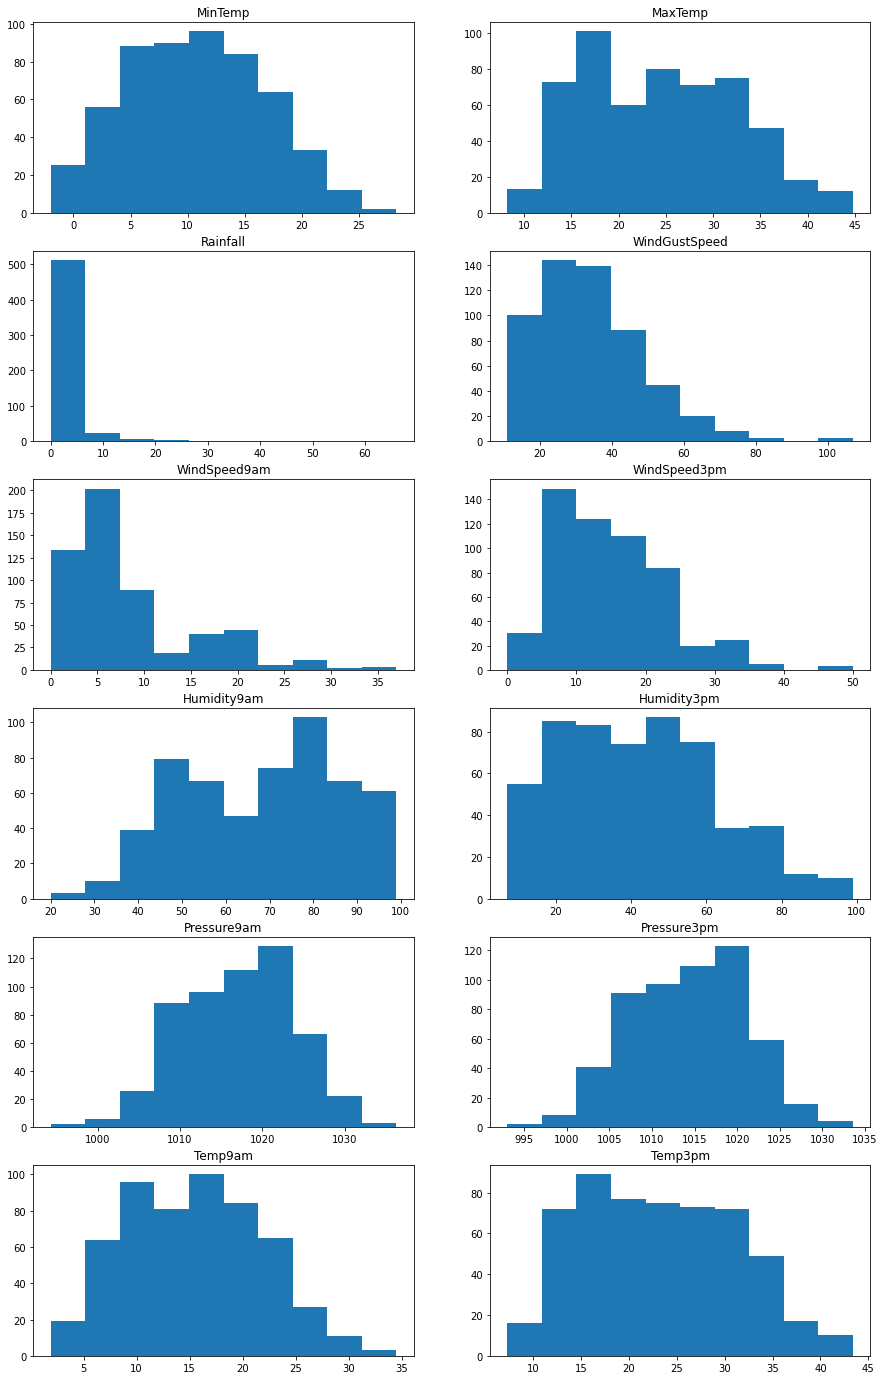

In [26]:
#Histogram
plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(data[all_col[i]])
    plt.title(all_col[i])

plt.show()

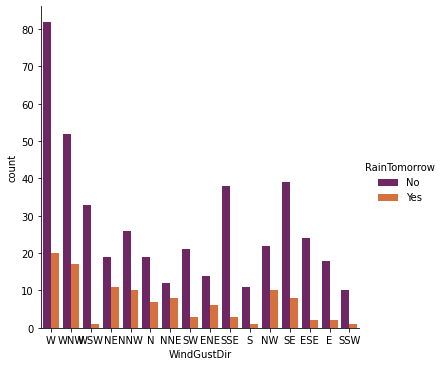

In [27]:
#Visualisasi Diagram Batang pada 2 Variabel Kategorik
sns.catplot(x="WindGustDir",kind="count",hue="RainTomorrow",palette="inferno",data=data)

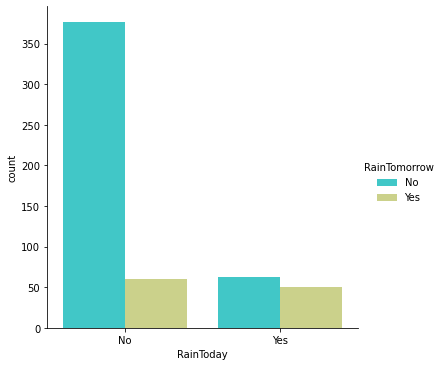

In [28]:
#Visualisasi Diagram Batang pada 2 Variabel Kategorik
sns.catplot(x="RainToday",kind="count",hue="RainTomorrow",palette="rainbow",data=data)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Temp3pm'>

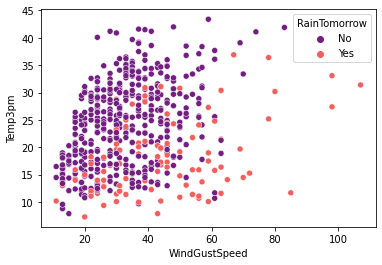

In [29]:
#Visualisasi Scatterplot antara Variabel Kategorik dan 2 Variabel Numerik/Continue
sns.scatterplot(x='WindGustSpeed',y='Temp3pm',data=data,palette='magma',hue='RainTomorrow')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


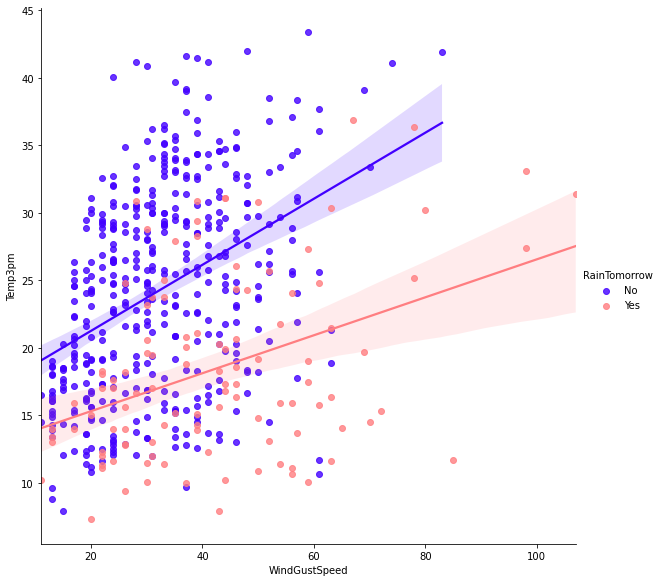

In [30]:
#Visualisasi Scatterplot antara Variabel Kategorik dan 2 Variabel Numerik/Continue
sns.lmplot(x='WindGustSpeed',y='Temp3pm',hue='RainTomorrow',data=data,palette='gnuplot2',size=8)

<function matplotlib.pyplot.show(close=None, block=None)>

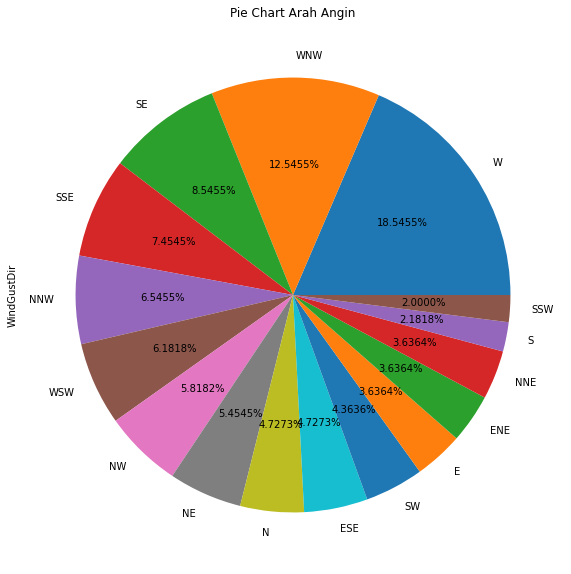

In [31]:
#Visualisasi Pie Chart Variabel Arah Angin
Type=data['WindGustDir'].value_counts()
plt.figure(figsize=(10,10))
Type.plot.pie(autopct='%.4f%%',shadow=False)
plt.title('Pie Chart Arah Angin')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

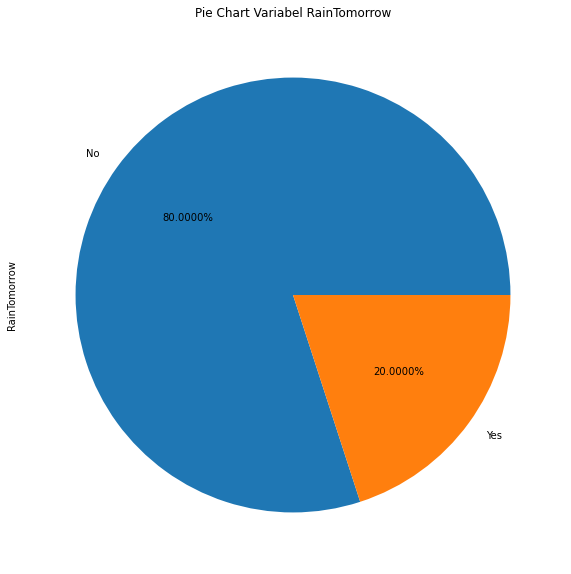

In [32]:
#Visualisasi Pie Chart Variabel Hujan Besok
Type=data['RainTomorrow'].value_counts()
plt.figure(figsize=(10,10))
Type.plot.pie(autopct='%.4f%%',shadow=False)
plt.title('Pie Chart Variabel RainTomorrow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

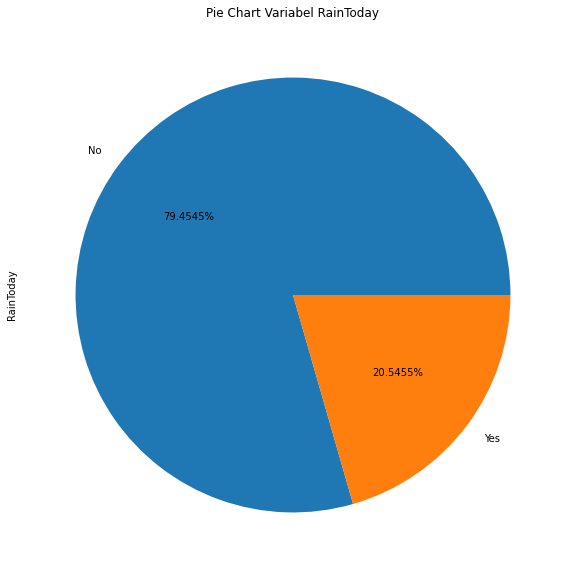

In [33]:
#Visualisasi Pie Chart Variabel RainToday
Type=data['RainToday'].value_counts()
plt.figure(figsize=(10,10))
Type.plot.pie(autopct='%.4f%%',shadow=False)
plt.title('Pie Chart Variabel RainToday')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

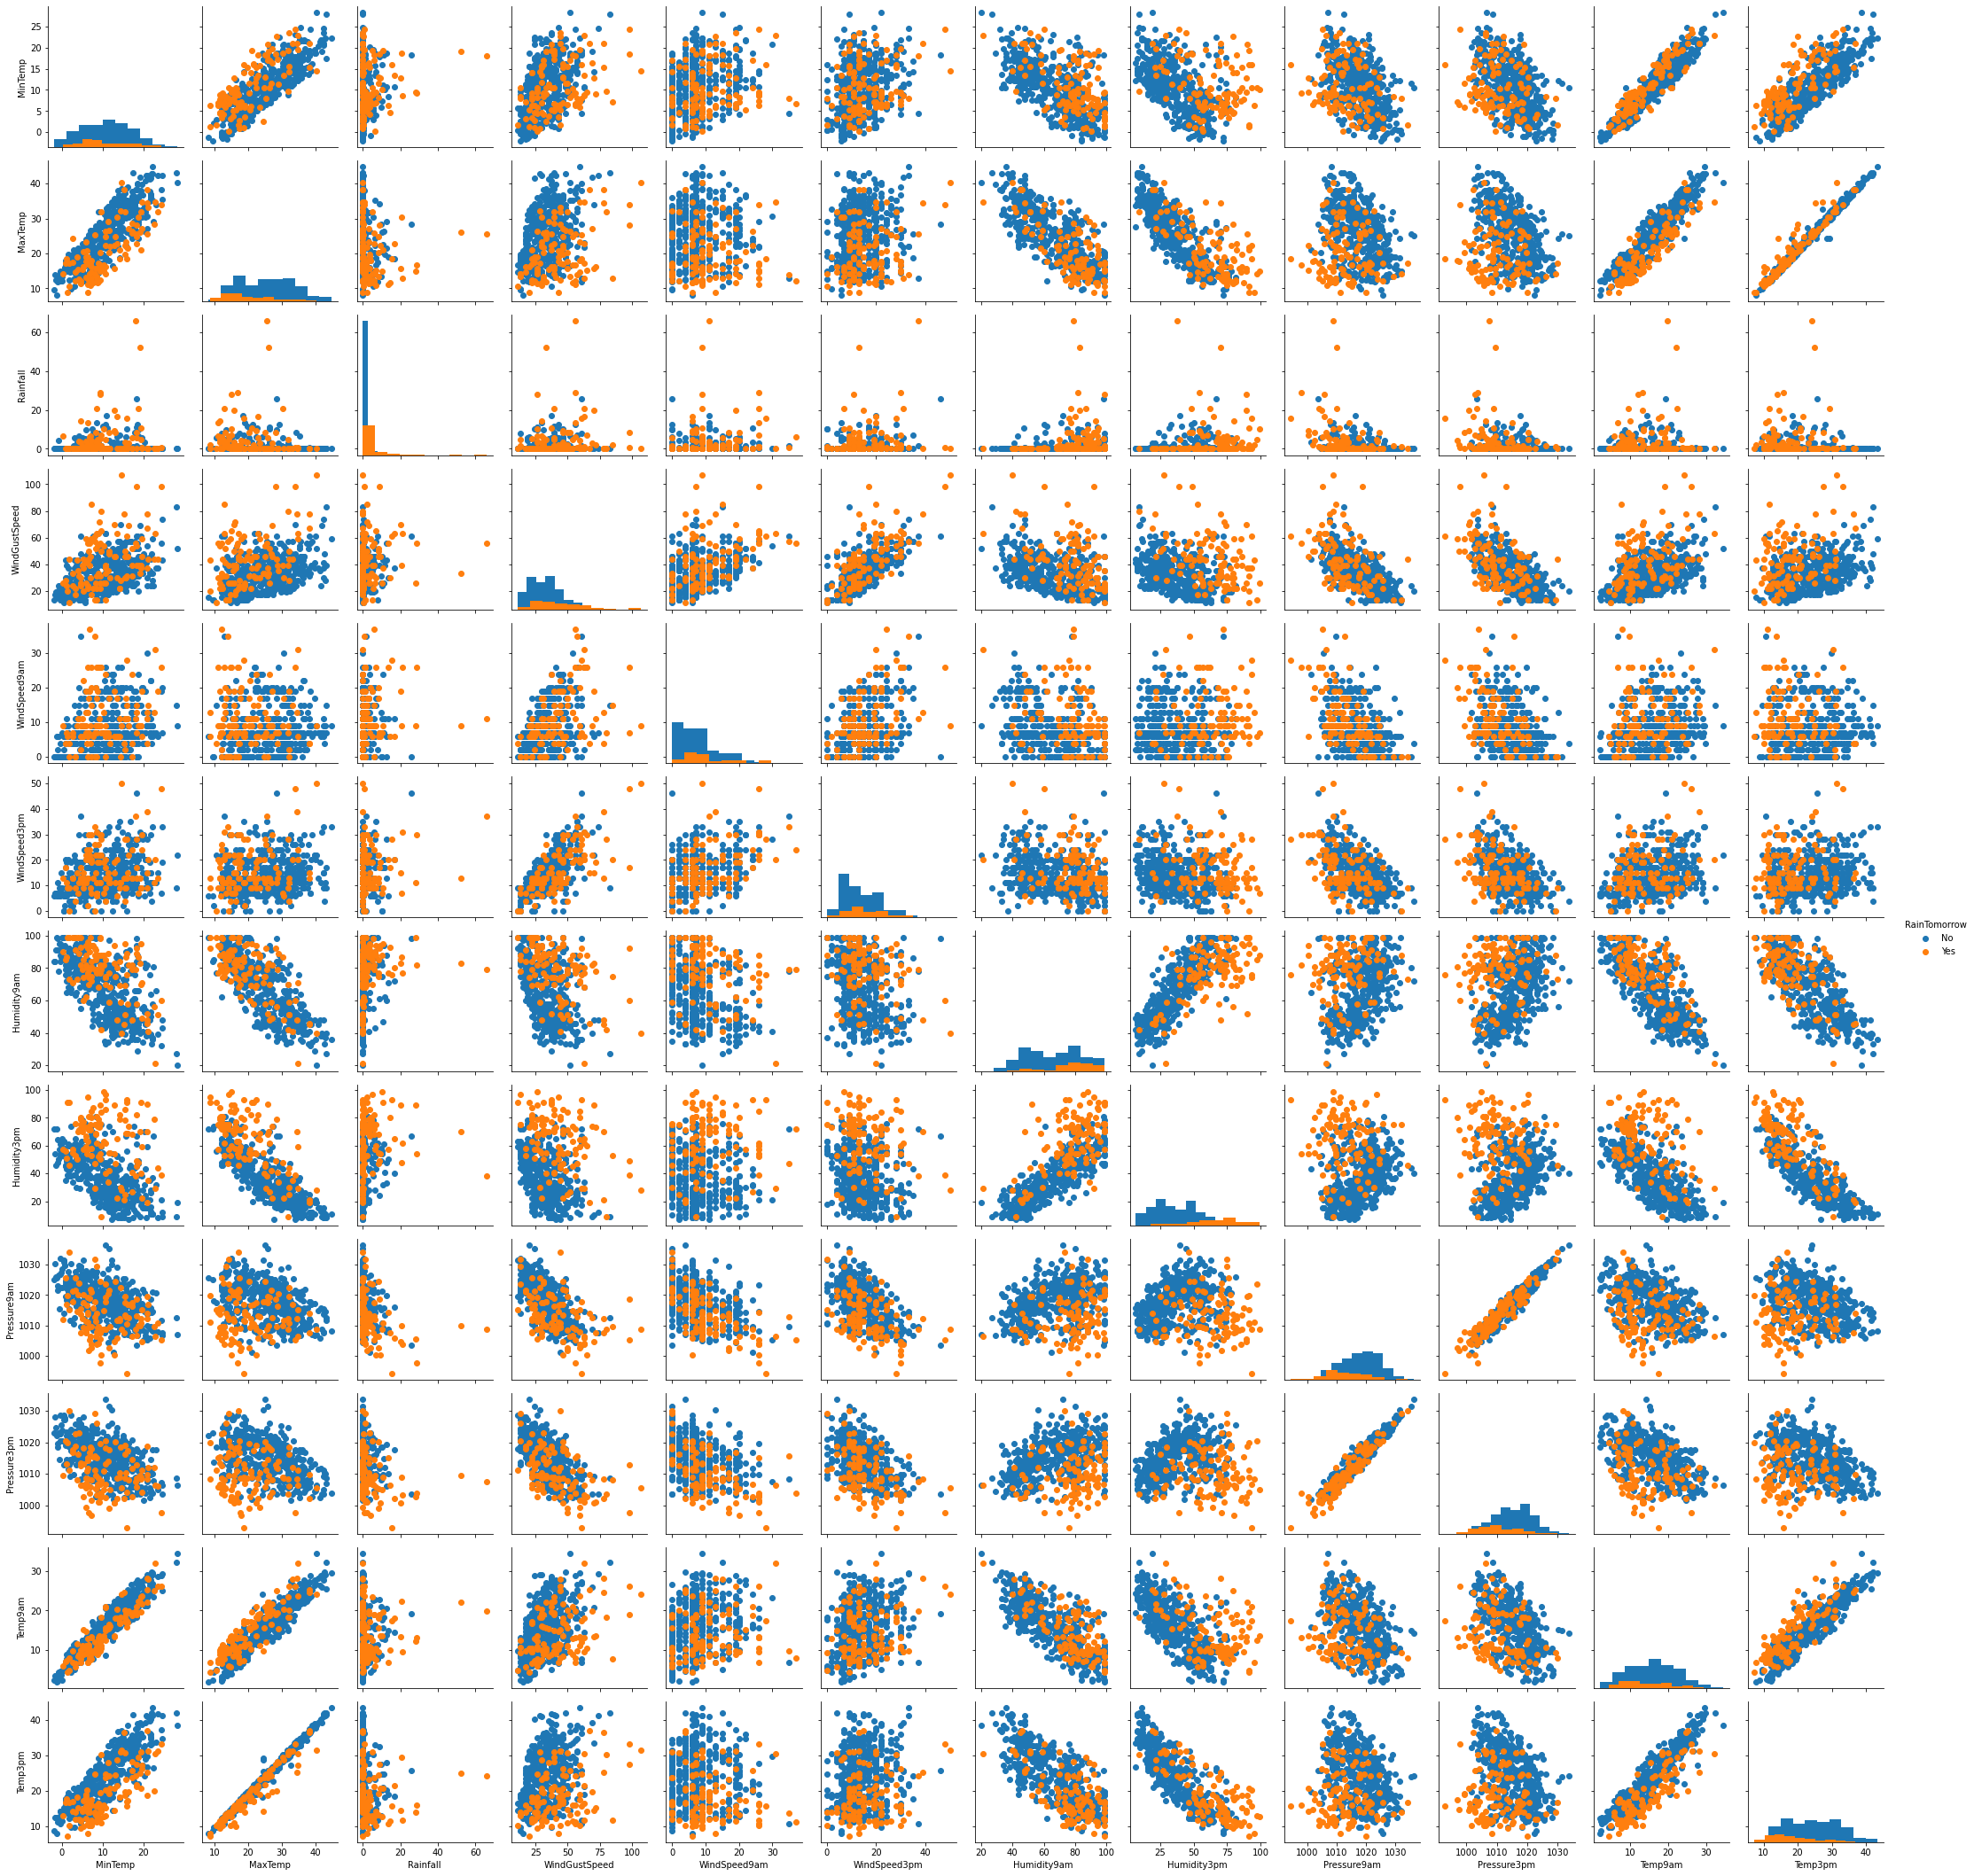

In [34]:
#visualisasi matrix scatterplot dengan variabel kategorik RainTomorrow
g=sns.PairGrid(data,hue='RainTomorrow')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show

In [35]:
#seleksi data numerik
data_numerik = data.select_dtypes([np.number])
data_numerik.head(3)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71,22,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44,25,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38,30,1007.6,1008.7,21.0,23.2


In [36]:
#seleksi data kategorik
data_kategori=data.drop(columns=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'])
data_kategori.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,01/01/2009,Adelaide,W,W,WNW,No,No
1,01/01/2009,Brisbane,WNW,NNW,WSW,No,No
2,01/01/2009,Canberra,WSW,W,WSW,No,No
3,01/01/2009,Sydney,NE,SE,E,No,No
4,01/01/2009,Melbourne,W,ENE,NW,No,No


In [37]:
# feature selection - correlation thresholds: buang variabel yang punya korelasi tinggi dengan yang lain
def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(data_numerik,thresh=0.9)

['MinTemp', 'Temp3pm', 'MaxTemp', 'Pressure9am']

In [38]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2

data_k1=data_kategori.drop(columns=['Date'])
X=data_k1.iloc[:,1:13]
X=pd.get_dummies(X)

Y=data_k1.iloc[:,0]
Y=pd.get_dummies(Y)

#feature selection dengan ChiSq
best_features=SelectKBest(score_func=chi2,k=5)
fit=best_features.fit(X,Y)

#data1
data1_scores=pd.DataFrame(fit.scores_)

#data1 for column names
data1_columns=pd.DataFrame(X.columns)

#concat two dataframes for better visualization
feature_scores=pd.concat([data1_columns,data1_scores],axis=1)

#naming the dataframe columns
feature_scores.columns=['Selected Columns','Score Chi-Sq']

#Print 8 Best Features
print(feature_scores.nlargest(20,'Score Chi-Sq'))

   Selected Columns  Score Chi-Sq
8     WindGustDir_S     11.333333
15  WindGustDir_WSW     11.000000
38   WindDir3pm_NNW     10.000000
41    WindDir3pm_SE      9.181818
27   WindDir9am_SSW      8.250000
37   WindDir3pm_NNE      8.000000
36    WindDir3pm_NE      7.454545
9    WindGustDir_SE      7.361702
42   WindDir3pm_SSE      6.809524
11  WindGustDir_SSW      6.727273
32     WindDir3pm_E      6.285714
5   WindGustDir_NNE      6.000000
2   WindGustDir_ESE      5.923077
12   WindGustDir_SW      5.583333
22   WindDir9am_NNW      5.000000
21   WindDir9am_NNE      4.909091
34   WindDir3pm_ESE      4.777778
19     WindDir9am_N      4.322581
46   WindDir3pm_WNW      4.307692
4    WindGustDir_NE      3.666667


In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

datay=data['RainTomorrow']

#feature selection using f_classif
feature_selection=SelectKBest(score_func=f_classif,k=5)
fit=feature_selection.fit(data_numerik,datay)

#data1
data1_scores=pd.DataFrame(fit.scores_)

#data1 for column names
data1_columns=pd.DataFrame(data_numerik.columns)

#concat two dataframes for better visualization
feature_scores=pd.concat([data1_columns,data1_scores],axis=1)

#naming the dataframe columns
feature_scores.columns=['Selected Columns','Score ANOVA']

#Print 8 Best Features
print(feature_scores.nlargest(20,'Score ANOVA'))

   Selected Columns  Score ANOVA
7       Humidity3pm   199.139665
9       Pressure3pm    60.711458
8       Pressure9am    56.059942
11          Temp3pm    52.518107
2          Rainfall    48.820048
3     WindGustSpeed    47.580848
1           MaxTemp    37.122888
6       Humidity9am    34.375711
4      WindSpeed9am    28.530348
5      WindSpeed3pm     7.875717
10          Temp9am     4.700899
0           MinTemp     0.001334


In [40]:
data2=data.drop(['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','WindSpeed3pm','Temp9am','MinTemp'], axis=1)
data2.head()

,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainTomorrow
0,22.9,0.6,44.0,20.0,71,22,1007.7,1007.1,21.8,No
1,25.1,0.0,44.0,4.0,44,25,1010.6,1007.8,24.3,No
2,25.7,0.0,46.0,19.0,38,30,1007.6,1008.7,23.2,No
3,28.0,0.0,24.0,11.0,45,16,1017.6,1012.8,26.5,No
4,32.3,1.0,41.0,7.0,82,33,1010.8,1006.0,29.7,No


In [41]:
from sklearn.linear_model import Lasso
target=data_numerik['WindGustSpeed']
features = data_numerik.drop('WindGustSpeed',axis=1)
lasso=Lasso(alpha=0.025)
lasso.fit(features,target)

Lasso(alpha=0.025)

In [42]:
lasso_coef=pd.DataFrame({'Feature':features.columns,'Lasso Coef':
                        lasso.coef_}).sort_values(by='Lasso Coef',
                                                 ascending=False)
lasso_coef

,Feature,Lasso Coef
1,MaxTemp,1.115100
7,Pressure9am,1.021976
4,WindSpeed3pm,0.878055
0,MinTemp,0.797991
3,WindSpeed9am,0.220907
2,Rainfall,0.184257
5,Humidity9am,-0.060480
6,Humidity3pm,-0.093881
9,Temp9am,-0.291953
10,Temp3pm,-1.498219


In [43]:
lasso_coef['Lasso Coef']=abs(lasso_coef['Lasso Coef'])
lasso_coef.sort_values(by='Lasso Coef',ascending=False)

,Feature,Lasso Coef
8,Pressure3pm,1.508376
10,Temp3pm,1.498219
1,MaxTemp,1.115100
7,Pressure9am,1.021976
4,WindSpeed3pm,0.878055
0,MinTemp,0.797991
9,Temp9am,0.291953
3,WindSpeed9am,0.220907
2,Rainfall,0.184257
6,Humidity3pm,0.093881


In [44]:
lasso_data1=lasso_coef.sort_values(by='Lasso Coef',ascending=False).head()
lasso_data1=pd.DataFrame({'Lasso Method':lasso_data1['Feature'].values})
lasso_data1

,Lasso Method
0,Pressure3pm
1,Temp3pm
2,MaxTemp
3,Pressure9am
4,WindSpeed3pm


In [45]:
#Feature Extraction dengan PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [46]:
data2.shape

(550, 10)

In [47]:
#set up the feature
feature=data2.iloc[0:550,1:10]
feature.head()

,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainTomorrow
0,0.6,44.0,20.0,71,22,1007.7,1007.1,21.8,No
1,0.0,44.0,4.0,44,25,1010.6,1007.8,24.3,No
2,0.0,46.0,19.0,38,30,1007.6,1008.7,23.2,No
3,0.0,24.0,11.0,45,16,1017.6,1012.8,26.5,No
4,1.0,41.0,7.0,82,33,1010.8,1006.0,29.7,No


In [48]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data2.Location = LE.fit_transform(data.Location)
data2.WindDir3pm = LE.fit_transform(data.WindDir3pm)
data2.WindDir9am = LE.fit_transform(data.WindDir9am)
data2.RainTomorrow = LE.fit_transform(data.RainTomorrow)
data2.head()

<ipython-input-48-66942b943ee8>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.Location = LE.fit_transform(data.Location)
<ipython-input-48-66942b943ee8>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.WindDir3pm = LE.fit_transform(data.WindDir3pm)
<ipython-input-48-66942b943ee8>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.WindDir9am = LE.fit_transform(data.WindDir9am)


,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainTomorrow
0,22.9,0.6,44.0,20.0,71,22,1007.7,1007.1,21.8,0
1,25.1,0.0,44.0,4.0,44,25,1010.6,1007.8,24.3,0
2,25.7,0.0,46.0,19.0,38,30,1007.6,1008.7,23.2,0
3,28.0,0.0,24.0,11.0,45,16,1017.6,1012.8,26.5,0
4,32.3,1.0,41.0,7.0,82,33,1010.8,1006.0,29.7,0


In [49]:
#Define Y
y = data2['RainTomorrow']

#Define x
x = data2.drop(['RainTomorrow'], axis=1)

In [50]:
#Principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
datapca=data2.drop('RainTomorrow', axis=1)

In [52]:
#Standarization
datapca_std=StandardScaler().fit_transform(datapca)

In [53]:
#Calculate covariance matrix
cov_mat = np.cov(datapca_std.T)

In [54]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eig_val)
print('Eigenvectors \n%s' %eig_vec)


Eigenvalues 
[4.03309202 2.55879817 0.86879809 0.67067045 0.00829266 0.02545141
 0.25030762 0.16806044 0.43292259]
Eigenvectors 
[[-0.43210557  0.24373425 -0.20214566  0.01632787  0.67874804 -0.15699351
  -0.47303637  0.05959287  0.00939908]
 [ 0.02655224 -0.34619989 -0.75438236 -0.53405052  0.01535106  0.04412023
   0.11747859  0.05773397  0.07629701]
 [-0.30803393 -0.32324165  0.10243193 -0.07176541 -0.0260651  -0.01671732
   0.02196299  0.02237655 -0.88489854]
 [-0.18163844 -0.3602952   0.5362351  -0.57465925  0.01675226  0.0444507
  -0.28280854 -0.23124037  0.28931683]
 [ 0.42318959 -0.17915396 -0.18636837  0.21278464  0.05733296 -0.04023185
  -0.39085521 -0.72712817 -0.14971679]
 [ 0.36726783 -0.3405387   0.02671953  0.13938895 -0.09463656 -0.02222512
  -0.56657891  0.63126845 -0.00655547]
 [ 0.29737463  0.44912831  0.04862763 -0.34749614  0.10848812  0.69778754
  -0.14769112  0.04959587 -0.25255559]
 [ 0.32099474  0.40596917  0.06873544 -0.44006784 -0.10620756 -0.69154742
  -0.0

In [55]:
pca=PCA(n_components=4)
datapca_pca = pca.fit(datapca_std).transform(datapca_std)

[4.03309202 2.55879817 0.86879809 0.67067045]


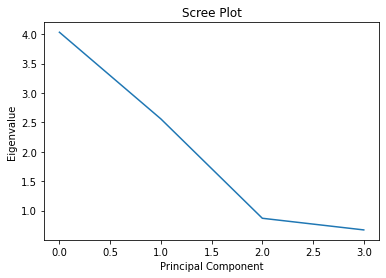

In [56]:
#Scree Plot
eigen_val = pca.explained_variance_
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.plot(eigen_val)
print(eigen_val)

# Naive Bayes

In [57]:
###REPEATED HOLDOUT####

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.25)
    nb=nb.fit(x_train_1,y_train_1)
    y_pred1 = nb.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred1)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi1=np.mean(ac)
spesifisiti1=np.mean(sp)
sensitiviti1=np.mean(se)
print(akurasi1)
print(spesifisiti1)
print(sensitiviti1)

df_k1=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k1=pd.concat([df_k1,pd.DataFrame(test[i])],axis=1)
df_k1.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k1

#menghitung auc
auc_nb1= round(roc_auc_score(y_test_1, y_pred1)*100, 2)
auc_nb1

0.8478260869565217
0.5643458393458394
0.9162668196582521


78.33

<function matplotlib.pyplot.show(close=None, block=None)>

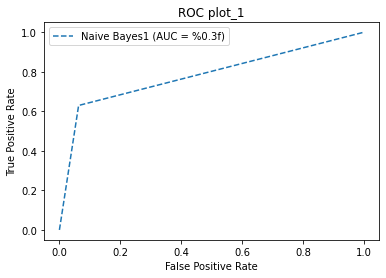

In [58]:
#menghitung roc
nb_fpr, nb_tpr, _ = roc_curve(y_test_1, y_pred1)

#roc curve
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = 'Naive Bayes1 (AUC = %0.3f)')

plt.title('ROC plot_1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [59]:
### METODE CV ###
from sklearn.model_selection import KFold
kf2 = KFold(n_splits=10, shuffle=False)
kf2.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf2.split(y):
    x_train_2, x_test_2 = x.iloc[train_index], x.iloc[test_index]
    y_train_2, y_test_2 = y[train_index], y[test_index]

In [60]:
### METODE CV ###

from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    nb =nb.fit(x_train_2,y_train_2)
    y_pred2 = nb.predict(x_test_2)
    cm.append((confusion_matrix(y_test_2, y_pred2)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi2=np.mean(ac)
spesifisiti2=np.mean(sp)
sensitiviti2=np.mean(se)
print(akurasi2)
print(spesifisiti2)
print(sensitiviti2)

df_k2=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k2=pd.concat([df_k2,pd.DataFrame(test[i])],axis=1)
df_k2.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k2

#menghitung auc
auc_nb2= round(roc_auc_score(y_test_2, y_pred2)*100, 2)
auc_nb2

0.8363636363636363
0.4444444444444445
0.9130434782608695


67.87

<function matplotlib.pyplot.show(close=None, block=None)>

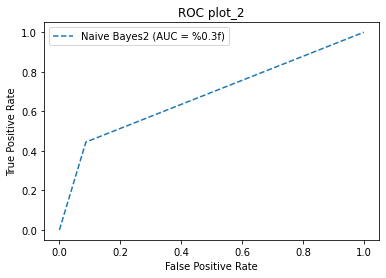

In [61]:
#menghitung roc
nb_fpr, nb_tpr, _ = roc_curve(y_test_2, y_pred2)

#roc curve
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = 'Naive Bayes2 (AUC = %0.3f)')

plt.title('ROC plot_2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

# SVM LINEAR

In [62]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_linear =  SVC(kernel='linear')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.25)
    svclassifier_linear=svclassifier_linear.fit(x_train_3,y_train_3)
    y_pred3 = svclassifier_linear.predict(x_test_3)
    cm.append((confusion_matrix(y_test_3, y_pred3)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print(akurasi3)
print(spesifisiti3)
print(sensitiviti3)

df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

#menghitung auc
auc_svclassifier_linear3= round(roc_auc_score(y_test_3, y_pred3)*100, 2)
auc_svclassifier_linear3

0.8956521739130434
0.6192704275102592
0.962202325429568


80.26

<function matplotlib.pyplot.show(close=None, block=None)>

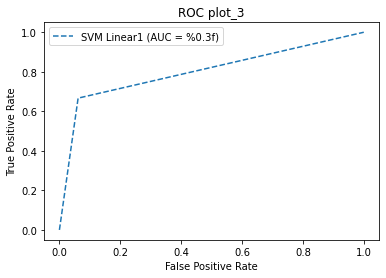

In [63]:
#menghitung roc
svclassifier_linear_fpr, svclassifier_linear_tpr, _ = roc_curve(y_test_3, y_pred3)

#roc curve
plt.plot(svclassifier_linear_fpr, svclassifier_linear_tpr, linestyle = '--', label = 'SVM Linear1 (AUC = %0.3f)')

plt.title('ROC plot_3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

Text(91.68, 0.5, 'predicted label')

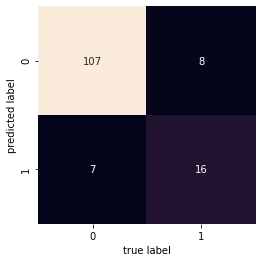

In [64]:
from sklearn.metrics import confusion_matrix
cm_svmlinear1 = confusion_matrix(y_test_3, y_pred3)
sns.heatmap(cm_svmlinear1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [65]:
### METODE CV ###
from sklearn.model_selection import KFold
kf4 = KFold(n_splits=10, shuffle=False)
kf4.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf4.split(y):
    x_train_4, x_test_4 = x.iloc[train_index], x.iloc[test_index]
    y_train_4, y_test_4 = y[train_index], y[test_index]

In [66]:
### METODE CV ###

svclassifier_linear =  SVC(kernel='linear')
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_linear = svclassifier_linear.fit(x_train_4,y_train_4)
    y_pred4 = svclassifier_linear.predict(x_test_4)
    cm.append((confusion_matrix(y_test_4, y_pred4)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi4=np.mean(ac)
spesifisiti4=np.mean(sp)
sensitiviti4=np.mean(se)
print(akurasi4)
print(spesifisiti4)
print(sensitiviti4)

df_k4=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k4=pd.concat([df_k4,pd.DataFrame(test[i])],axis=1)
df_k4.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k4

#menghitung auc
auc_svmlinear4= round(roc_auc_score(y_test_4, y_pred4)*100, 2)
auc_svmlinear4

0.9272727272727274
0.5555555555555556
1.0


77.78

<function matplotlib.pyplot.show(close=None, block=None)>

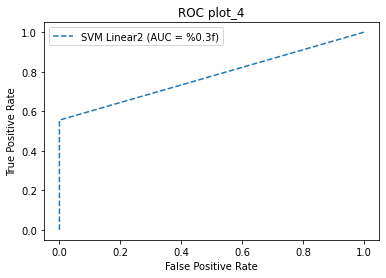

In [67]:
#menghitung roc
svclassifier_linear_fpr, svclassifier_linear_tpr, _ = roc_curve(y_test_4, y_pred4)

#roc curve
plt.plot(svclassifier_linear_fpr, svclassifier_linear_tpr, linestyle = '--', label = 'SVM Linear2 (AUC = %0.3f)')

plt.title('ROC plot_4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

Text(91.68, 0.5, 'predicted label')

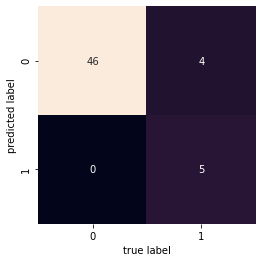

In [68]:
from sklearn.metrics import confusion_matrix
cm_svmlinear2 = confusion_matrix(y_test_4, y_pred4)
sns.heatmap(cm_svmlinear2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# SVM Polinom

In [69]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_polinom = SVC(kernel='poly')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x, y, test_size=0.25)
    svclassifier_polinom=svclassifier_polinom.fit(x_train_5,y_train_5)
    y_pred5 = svclassifier_polinom.predict(x_test_5)
    cm.append((confusion_matrix(y_test_5, y_pred5)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi5=np.mean(ac)
spesifisiti5=np.mean(sp)
sensitiviti5=np.mean(se)
print(akurasi5)
print(spesifisiti5)
print(sensitiviti5)

df_k5=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k5=pd.concat([df_k5,pd.DataFrame(test[i])],axis=1)
df_k5.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k5

#menghitung auc
auc_svclassifier_polinom5= round(roc_auc_score(y_test_5, y_pred5)*100, 2)
auc_svclassifier_polinom5

0.8072463768115942
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

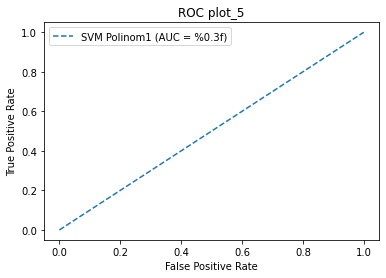

In [70]:
#menghitung roc
svclassifier_polinom_fpr, svclassifier_polinom_tpr, _ = roc_curve(y_test_5, y_pred5)

#roc curve
plt.plot(svclassifier_polinom_fpr, svclassifier_polinom_tpr, linestyle = '--', label = 'SVM Polinom1 (AUC = %0.3f)')

plt.title('ROC plot_5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [71]:
### METODE CV ###
from sklearn.model_selection import KFold
kf6 = KFold(n_splits=10, shuffle=False)
kf6.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf6.split(y):
    x_train_6, x_test_6 = x.iloc[train_index], x.iloc[test_index]
    y_train_6, y_test_6 = y[train_index], y[test_index]

In [72]:
### METODE CV ###

svclassifier_polinom =  SVC(kernel='poly')
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_polinom = svclassifier_polinom.fit(x_train_6,y_train_6)
    y_pred6 = svclassifier_polinom.predict(x_test_6)
    cm.append((confusion_matrix(y_test_6, y_pred6)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi6=np.mean(ac)
spesifisiti6=np.mean(sp)
sensitiviti6=np.mean(se)
print(akurasi6)
print(spesifisiti6)
print(sensitiviti6)

df_k6=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k6=pd.concat([df_k6,pd.DataFrame(test[i])],axis=1)
df_k6.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k6

#menghitung auc
auc_svmpolinom6= round(roc_auc_score(y_test_6, y_pred6)*100, 2)
auc_svmpolinom6

0.8363636363636363
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

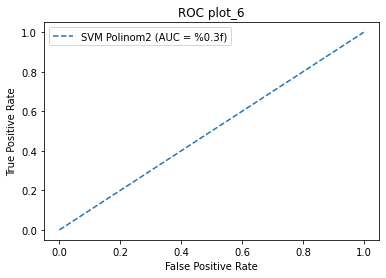

In [73]:
#menghitung roc
svclassifier_polinom_fpr, svclassifier_polinom_tpr, _ = roc_curve(y_test_6, y_pred6)

#roc curve
plt.plot(svclassifier_polinom_fpr, svclassifier_polinom_tpr, linestyle = '--', label = 'SVM Polinom2 (AUC = %0.3f)')

plt.title('ROC plot_6')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

# SVM RBF

In [74]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_rbf = SVC(kernel='rbf')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x, y, test_size=0.25)
    svclassifier_rbf=svclassifier_rbf.fit(x_train_7,y_train_7)
    y_pred7 = svclassifier_rbf.predict(x_test_7)
    cm.append((confusion_matrix(y_test_7, y_pred7)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi7=np.mean(ac)
spesifisiti7=np.mean(sp)
sensitiviti7=np.mean(se)
print(akurasi7)
print(spesifisiti7)
print(sensitiviti7)

df_k7=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k7=pd.concat([df_k7,pd.DataFrame(test[i])],axis=1)
df_k7.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k7

#menghitung auc
auc_svclassifier_rbf7= round(roc_auc_score(y_test_7, y_pred7)*100, 2)
auc_svclassifier_rbf7

0.7942028985507246
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

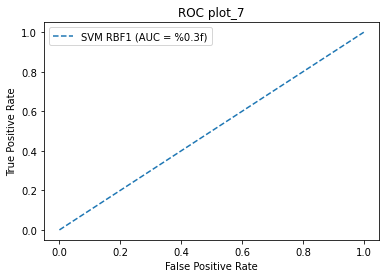

In [75]:
#menghitung roc
svclassifier_rbf_fpr, svclassifier_rbf_tpr, _ = roc_curve(y_test_7, y_pred7)

#roc curve
plt.plot(svclassifier_rbf_fpr, svclassifier_rbf_tpr, linestyle = '--', label = 'SVM RBF1 (AUC = %0.3f)')

plt.title('ROC plot_7')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [76]:
### METODE CV ###
from sklearn.model_selection import KFold
kf8 = KFold(n_splits=10, shuffle=False)
kf8.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf8.split(y):
    x_train_8, x_test_8 = x.iloc[train_index], x.iloc[test_index]
    y_train_8, y_test_8 = y[train_index], y[test_index]

In [77]:
### METODE CV ###

svclassifier_rbf =  SVC(kernel='rbf', random_state=1)
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_rbf = svclassifier_rbf.fit(x_train_8,y_train_8)
    y_pred8 = svclassifier_rbf.predict(x_test_8)
    cm.append((confusion_matrix(y_test_8, y_pred8)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi8=np.mean(ac)
spesifisiti8=np.mean(sp)
sensitiviti8=np.mean(se)
print(akurasi8)
print(spesifisiti8)
print(sensitiviti8)

df_k8=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k8=pd.concat([df_k8,pd.DataFrame(test[i])],axis=1)
df_k8.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k8

#menghitung auc
auc_svmrbf8= round(roc_auc_score(y_test_8, y_pred8)*100, 2)
auc_svmrbf8

0.8363636363636363
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

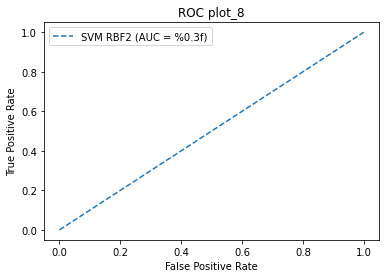

In [78]:
#menghitung roc
svclassifier_rbf_fpr, svclassifier_rbf_tpr, _ = roc_curve(y_test_8, y_pred8)

#roc curve
plt.plot(svclassifier_rbf_fpr, svclassifier_rbf_tpr, linestyle = '--', label = 'SVM RBF2 (AUC = %0.3f)')

plt.title('ROC plot_8')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

# SVM Sigmoid

In [79]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_rbf = SVC(kernel='sigmoid')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(x, y, test_size=0.25)
    svclassifier_rbf=svclassifier_rbf.fit(x_train_9,y_train_9)
    y_pred9 = svclassifier_rbf.predict(x_test_9)
    cm.append((confusion_matrix(y_test_9, y_pred9)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi9=np.mean(ac)
spesifisiti9=np.mean(sp)
sensitiviti9=np.mean(se)
print(akurasi9)
print(spesifisiti9)
print(sensitiviti9)

df_k9=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k9=pd.concat([df_k9,pd.DataFrame(test[i])],axis=1)
df_k9.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k9

#menghitung auc
auc_svclassifier_sigmoid9= round(roc_auc_score(y_test_9, y_pred9)*100, 2)
auc_svclassifier_sigmoid9

0.7927536231884058
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

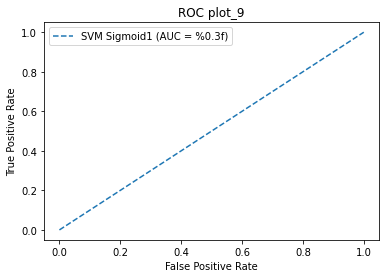

In [80]:
#menghitung roc
svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, _ = roc_curve(y_test_9, y_pred9)

#roc curve
plt.plot(svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, linestyle = '--', label = 'SVM Sigmoid1 (AUC = %0.3f)')

plt.title('ROC plot_9')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [81]:
### METODE CV ###
from sklearn.model_selection import KFold
kf10 = KFold(n_splits=10, shuffle=False)
kf10.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf10.split(y):
    x_train_10, x_test_10 = x.iloc[train_index], x.iloc[test_index]
    y_train_10, y_test_10 = y[train_index], y[test_index]

In [82]:
### METODE CV ###

svclassifier_sigmoid =  SVC(kernel='sigmoid', random_state=1)
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_sigmoid = svclassifier_sigmoid.fit(x_train_10,y_train_10)
    y_pred10 = svclassifier_rbf.predict(x_test_10)
    cm.append((confusion_matrix(y_test_10, y_pred10)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi10=np.mean(ac)
spesifisiti10=np.mean(sp)
sensitiviti10=np.mean(se)
print(akurasi10)
print(spesifisiti10)
print(sensitiviti10)

df_k10=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k10=pd.concat([df_k10,pd.DataFrame(test[i])],axis=1)
df_k10.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k10

#menghitung auc
auc_svmsigmoid10= round(roc_auc_score(y_test_10, y_pred10)*100, 2)
auc_svmsigmoid10

0.8363636363636363
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

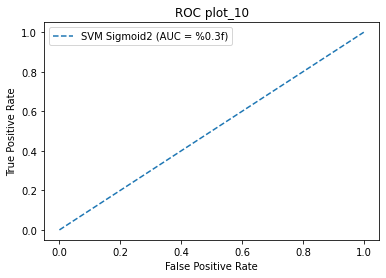

In [83]:
#menghitung roc
svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, _ = roc_curve(y_test_10, y_pred10)

#roc curve
plt.plot(svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, linestyle = '--', label = 'SVM Sigmoid2 (AUC = %0.3f)')

plt.title('ROC plot_10')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

# KNN

In [84]:
###REPEATED HOLDOUT####

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_11, x_test_11, y_train_11, y_test_11 = train_test_split(x, y, test_size=0.25)
    knn=knn.fit(x_train_11,y_train_11)
    y_pred11 = nb.predict(x_test_11)
    cm.append((confusion_matrix(y_test_11, y_pred11)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi11=np.mean(ac)
spesifisiti11=np.mean(sp)
sensitiviti11=np.mean(se)
print(akurasi11)
print(spesifisiti11)
print(sensitiviti11)

df_k11=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k11=pd.concat([df_k11,pd.DataFrame(test[i])],axis=1)
df_k11.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k11

#menghitung auc
auc_knn11= round(roc_auc_score(y_test_11, y_pred11)*100, 2)
auc_knn11

0.8304347826086957
0.5483974358974358
0.9050344444450111


71.3

<function matplotlib.pyplot.show(close=None, block=None)>

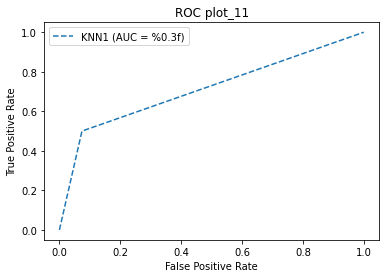

In [85]:
#menghitung roc
knn_fpr, knn_tpr, _ = roc_curve(y_test_11, y_pred11)

#roc curve
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'KNN1 (AUC = %0.3f)')

plt.title('ROC plot_11')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [86]:
### METODE CV ###
from sklearn.model_selection import KFold
kf12 = KFold(n_splits=10, shuffle=False)
kf12.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf12.split(y):
    x_train_12, x_test_12 = x.iloc[train_index], x.iloc[test_index]
    y_train_12, y_test_12 = y[train_index], y[test_index]

In [87]:
### METODE CV ###

from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    knn = knn.fit(x_train_12,y_train_12)
    y_pred12 = nb.predict(x_test_12)
    cm.append((confusion_matrix(y_test_12, y_pred12)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi12=np.mean(ac)
spesifisiti12=np.mean(sp)
sensitiviti12=np.mean(se)
print(akurasi12)
print(spesifisiti12)
print(sensitiviti12)

df_k12=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k12=pd.concat([df_k12,pd.DataFrame(test[i])],axis=1)
df_k12.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k12

#menghitung auc
auc_knn12= round(roc_auc_score(y_test_12, y_pred12)*100, 2)
auc_knn12

0.8363636363636363
0.4444444444444445
0.9130434782608695


67.87

<function matplotlib.pyplot.show(close=None, block=None)>

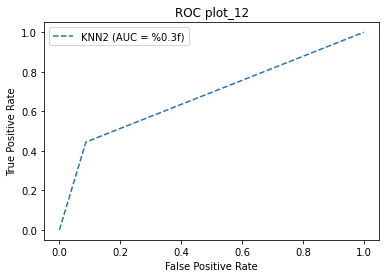

In [88]:
#menghitung roc
knn_fpr, knn_tpr, _ = roc_curve(y_test_12, y_pred12)

#roc curve
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'KNN2 (AUC = %0.3f)')

plt.title('ROC plot_12')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

# Random Forest

In [89]:
###REPEATED HOLDOUT####

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_13, x_test_13, y_train_13, y_test_13 = train_test_split(x, y, test_size=0.25)
    rf= rf.fit(x_train_13,y_train_13)
    y_pred13 = nb.predict(x_test_13)
    cm.append((confusion_matrix(y_test_13, y_pred13)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi13=np.mean(ac)
spesifisiti13=np.mean(sp)
sensitiviti13=np.mean(se)
print(akurasi13)
print(spesifisiti13)
print(sensitiviti13)

df_k13=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k13=pd.concat([df_k13,pd.DataFrame(test[i])],axis=1)
df_k13.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k13

#menghitung auc
auc_rf13= round(roc_auc_score(y_test_13, y_pred13)*100, 2)
auc_rf13

0.8536231884057971
0.6199731497373485
0.9201897115411916


72.04

<function matplotlib.pyplot.show(close=None, block=None)>

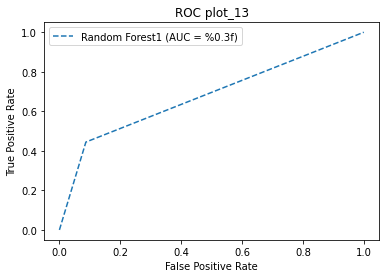

In [90]:
#menghitung roc
rf_fpr, rf_tpr, _ = roc_curve(y_test_13, y_pred13)

#roc curve
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'Random Forest1 (AUC = %0.3f)')

plt.title('ROC plot_13')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [91]:
### METODE CV ###
from sklearn.model_selection import KFold
kf14 = KFold(n_splits=10, shuffle=False)
kf14.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf14.split(y):
    x_train_14, x_test_14 = x.iloc[train_index], x.iloc[test_index]
    y_train_14, y_test_14 = y[train_index], y[test_index]

In [92]:
### METODE CV ###

from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    rf = rf.fit(x_train_14,y_train_14)
    y_pred14 = nb.predict(x_test_14)
    cm.append((confusion_matrix(y_test_14, y_pred14)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi14=np.mean(ac)
spesifisiti14=np.mean(sp)
sensitiviti14=np.mean(se)
print(akurasi14)
print(spesifisiti14)
print(sensitiviti14)

df_k14=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k14=pd.concat([df_k14,pd.DataFrame(test[i])],axis=1)
df_k14.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k14

#menghitung auc
auc_rf14= round(roc_auc_score(y_test_14, y_pred14)*100, 2)
auc_rf14

0.8363636363636363
0.4444444444444445
0.9130434782608695


67.87

<function matplotlib.pyplot.show(close=None, block=None)>

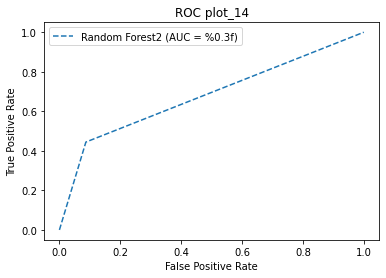

In [93]:
#menghitung roc
rf_fpr, rf_tpr, _ = roc_curve(y_test_14, y_pred14)

#roc curve
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = 'Random Forest2 (AUC = %0.3f)')

plt.title('ROC plot_14')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

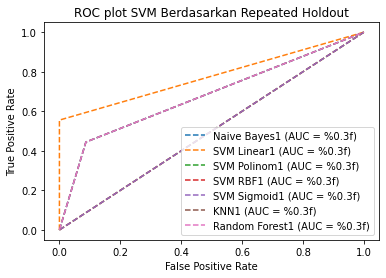

In [94]:
#ROC repeated holdout

#roc curve
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = 'Naive Bayes1 (AUC = %0.3f)')
plt.plot(svclassifier_linear_fpr, svclassifier_linear_tpr, linestyle = '--', label = 'SVM Linear1 (AUC = %0.3f)')
plt.plot(svclassifier_polinom_fpr, svclassifier_polinom_tpr, linestyle = '--', label = 'SVM Polinom1 (AUC = %0.3f)')
plt.plot(svclassifier_rbf_fpr, svclassifier_rbf_tpr, linestyle = '--', label = 'SVM RBF1 (AUC = %0.3f)')
plt.plot(svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, linestyle = '--', label = 'SVM Sigmoid1 (AUC = %0.3f)')
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'KNN1 (AUC = %0.3f)')
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'Random Forest1 (AUC = %0.3f)')

plt.title('ROC plot SVM Berdasarkan Repeated Holdout')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [95]:
#auc repeated holdout

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score AUC (Repeated Holdout)' : [auc_nb1, auc_svclassifier_linear3, auc_svclassifier_polinom5, auc_svclassifier_rbf7,
              auc_svclassifier_sigmoid9, auc_knn11, auc_rf13]
})
model.sort_values(by='Score AUC (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score AUC (Repeated Holdout)
1,SVM LINIER,80.26
0,Naive Bayes,78.33
6,Random Forest,72.04
5,KNN,71.30
2,SVM POLINOM,50.00
3,SVM RBF,50.00
4,SVM SIGMOID,50.00


In [96]:
#akurasi repeated holdout

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Akurasi (Repeated Holdout)' : [akurasi1, akurasi3, akurasi5, akurasi7,
              akurasi9, akurasi11, akurasi13]
})
model.sort_values(by='Score Akurasi (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Akurasi (Repeated Holdout)
1,SVM LINIER,0.895652
6,Random Forest,0.853623
0,Naive Bayes,0.847826
5,KNN,0.830435
2,SVM POLINOM,0.807246
3,SVM RBF,0.794203
4,SVM SIGMOID,0.792754


In [97]:
#spesifisiti repeated holdout

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Spesifisiti (Repeated Holdout)' : [spesifisiti1, spesifisiti3, spesifisiti5, spesifisiti7,
              spesifisiti9, spesifisiti11, spesifisiti13]
})
model.sort_values(by='Score Spesifisiti (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Spesifisiti (Repeated Holdout)
6,Random Forest,0.619973
1,SVM LINIER,0.619270
0,Naive Bayes,0.564346
5,KNN,0.548397
2,SVM POLINOM,0.000000
3,SVM RBF,0.000000
4,SVM SIGMOID,0.000000


In [98]:
#sensitiviti repeated holdout

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Sensitiviti (Repeated Holdout)' : [sensitiviti1, sensitiviti3, sensitiviti5, sensitiviti7,
              sensitiviti9, sensitiviti11, sensitiviti13]
})
model.sort_values(by='Score Sensitiviti (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Sensitiviti (Repeated Holdout)
2,SVM POLINOM,1.000000
3,SVM RBF,1.000000
4,SVM SIGMOID,1.000000
1,SVM LINIER,0.962202
6,Random Forest,0.920190
0,Naive Bayes,0.916267
5,KNN,0.905034


<function matplotlib.pyplot.show(close=None, block=None)>

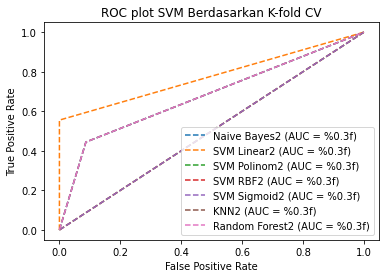

In [99]:
#ROC k-fold CV

#roc curve
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = 'Naive Bayes2 (AUC = %0.3f)')
plt.plot(svclassifier_linear_fpr, svclassifier_linear_tpr, linestyle = '--', label = 'SVM Linear2 (AUC = %0.3f)')
plt.plot(svclassifier_polinom_fpr, svclassifier_polinom_tpr, linestyle = '--', label = 'SVM Polinom2 (AUC = %0.3f)')
plt.plot(svclassifier_rbf_fpr, svclassifier_rbf_tpr, linestyle = '--', label = 'SVM RBF2 (AUC = %0.3f)')
plt.plot(svclassifier_sigmoid_fpr, svclassifier_sigmoid_tpr, linestyle = '--', label = 'SVM Sigmoid2 (AUC = %0.3f)')
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'KNN2 (AUC = %0.3f)')
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = 'Random Forest2 (AUC = %0.3f)')

plt.title('ROC plot SVM Berdasarkan K-fold CV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [100]:
#auc CV

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score AUC (Repeated Holdout)' : [auc_nb2, auc_svmlinear4, auc_svmpolinom6, auc_svmrbf8,
              auc_svmsigmoid10, auc_knn12, auc_rf14]
})
model.sort_values(by='Score AUC (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score AUC (Repeated Holdout)
1,SVM LINIER,77.78
0,Naive Bayes,67.87
5,KNN,67.87
6,Random Forest,67.87
2,SVM POLINOM,50.00
3,SVM RBF,50.00
4,SVM SIGMOID,50.00


In [101]:
#akurasi CV

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Akurasi (Repeated Holdout)' : [akurasi2, akurasi4, akurasi6, akurasi8,
              akurasi10, akurasi12, akurasi14]
})
model.sort_values(by='Score Akurasi (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Akurasi (Repeated Holdout)
1,SVM LINIER,0.927273
0,Naive Bayes,0.836364
2,SVM POLINOM,0.836364
3,SVM RBF,0.836364
4,SVM SIGMOID,0.836364
5,KNN,0.836364
6,Random Forest,0.836364


In [102]:
#spesifisiti CV

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Spesifisiti (Repeated Holdout)' : [spesifisiti2, spesifisiti4, spesifisiti6, spesifisiti8,
              spesifisiti10, spesifisiti12, spesifisiti14]
})
model.sort_values(by='Score Spesifisiti (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Spesifisiti (Repeated Holdout)
1,SVM LINIER,0.555556
0,Naive Bayes,0.444444
5,KNN,0.444444
6,Random Forest,0.444444
2,SVM POLINOM,0.000000
3,SVM RBF,0.000000
4,SVM SIGMOID,0.000000


In [103]:
#sensitiviti CV

model = pd.DataFrame({
    'Model (Repeated Holdout)':['Naive Bayes','SVM LINIER', 'SVM POLINOM','SVM RBF', 'SVM SIGMOID', 'KNN', 'Random Forest'],
    'Score Sensitiviti (Repeated Holdout)' : [sensitiviti2, sensitiviti4, sensitiviti6, sensitiviti8,
              sensitiviti10, sensitiviti12, sensitiviti14]
})
model.sort_values(by='Score Sensitiviti (Repeated Holdout)', ascending=False)

,Model (Repeated Holdout),Score Sensitiviti (Repeated Holdout)
1,SVM LINIER,1.000000
2,SVM POLINOM,1.000000
3,SVM RBF,1.000000
4,SVM SIGMOID,1.000000
0,Naive Bayes,0.913043
5,KNN,0.913043
6,Random Forest,0.913043


# Decision TREE

In [104]:
#Repeated Holdout
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

dtc = DecisionTreeClassifier()
for j in range (n):
    x_train15, x_test15, y_train15, y_test15 = train_test_split(x, y, test_size=0.25)
    dtc=dtc.fit(x_train15,y_train15)
    y_pred_dtc = dtc.predict(x_test15)
    cm.append((confusion_matrix(y_test15, y_pred_dtc)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi15=np.mean(ac)
spesifisiti15=np.mean(sp)
sensitiviti15=np.mean(se)
print(akurasi15)
print(spesifisiti15)
print(sensitiviti15)

df_k15=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k15=pd.concat([df_k15,pd.DataFrame(test[i])],axis=1)
df_k15.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k15

0.8101449275362318
0.5825002954035212
0.8698839141128861


,Akurasi,Spesitifitas,Sensitivitas
0,0.760870,0.483871,0.841121
1,0.804348,0.500000,0.881818
2,0.818841,0.538462,0.883929
3,0.847826,0.809524,0.854701
4,0.818841,0.580645,0.887850


In [105]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
acc_dtc = round(accuracy_score(y_test15, y_pred_dtc)*100, 2)
auc_dtc = round(roc_auc_score(y_test15, y_pred_dtc, average='micro')*100, 2)
f1_dtc = round(f1_score(y_test15, y_pred_dtc, average='micro')*100, 2)
kb_dtc = pd.DataFrame({
    'Kriteria' : ['Akurasi','Roc Auc Score', 'F1 score'],
    'Score': [acc_dtc, auc_dtc, f1_dtc]})
kb_dtc.sort_values(by='Score', ascending=False)

,Kriteria,Score
0,Akurasi,81.88
2,F1 score,81.88
1,Roc Auc Score,73.42


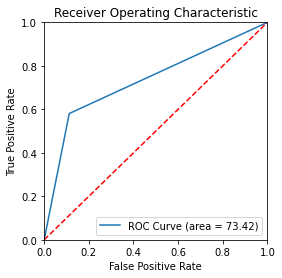

In [106]:
fpr, tpr, threshold = roc_curve(y_test15, y_pred_dtc)

plt. figure(figsize = [4,4])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_dtc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Text(91.68, 0.5, 'predicted label')

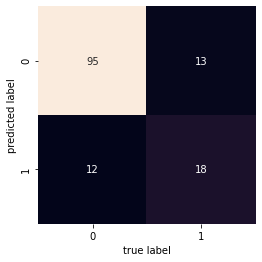

In [107]:
cm_dtc = confusion_matrix(y_test15, y_pred_dtc)
sns.heatmap(cm_dtc.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [108]:
#Metode CV
kf16 = KFold(n_splits=10, shuffle=False)
kf16.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf16.split(y):
    x_train16, x_test16 = x.iloc[train_index], x.iloc[test_index]
    y_train16, y_test16 = y[train_index], y[test_index]

In [109]:
#Metode CV

#Buat Model
#Create Decision Tree Classifier Object
dtc2 = DecisionTreeClassifier()

#Train Decision Tree Classifier
dtc2 = dtc2.fit(x_train16,y_train16)

#Predict the response for test dataset
y_pred_dtc2 = dtc.predict(x_test16)

acc_dtc2 = round(accuracy_score(y_test16, y_pred_dtc2)*100, 2)
auc_dtc2 = round(roc_auc_score(y_test16, y_pred_dtc2, average='micro')*100, 2)
f1_dtc2 = round(f1_score(y_test16, y_pred_dtc2, average='micro')*100, 2)
kb_dtc2 = pd.DataFrame({
    'Kriteria' : ['Akurasi','Roc Auc Score', 'F1 score'],
    'Score': [acc_dtc2, auc_dtc2, f1_dtc2]})
kb_dtc2.sort_values(by='Score', ascending=False)

,Kriteria,Score
0,Akurasi,94.55
2,F1 score,94.55
1,Roc Auc Score,92.27


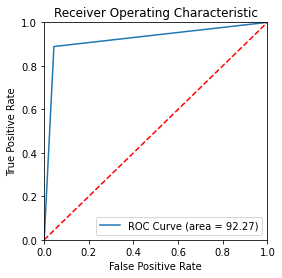

In [110]:
fpr, tpr, threshold = roc_curve(y_test16, y_pred_dtc2)

plt. figure(figsize = [4,4])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_dtc2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Text(91.68, 0.5, 'predicted label')

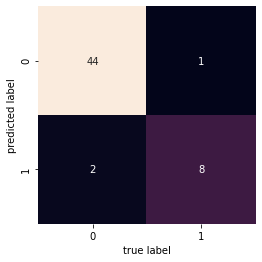

In [111]:
cm_dtc2 = confusion_matrix(y_test16, y_pred_dtc2)
sns.heatmap(cm_dtc2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [112]:
total1=sum(sum(cm_dtc2))
#####from confusion matrix calculate accuracy
accuracy_dtc=(cm_dtc2[0,0]+cm_dtc2[1,1])/total1
print ('Accuracy : ', accuracy_dtc)

sensitivity_dtc = cm_dtc2[0,0]/(cm_dtc2[0,0]+cm_dtc2[0,1])
print('Sensitivity : ', sensitivity_dtc )

specificity_dtc = cm_dtc2[1,1]/(cm_dtc2[1,0]+cm_dtc2[1,1])
print('Specificity : ', specificity_dtc)
k_dtc2 = pd.DataFrame({
    'Kriteria' : ['Akurasi','Sensitivity', 'Specificity'],
    'Score': [accuracy_dtc, sensitivity_dtc, specificity_dtc]})
k_dtc2.sort_values(by='Score', ascending=False)

Accuracy :  0.9454545454545454
Sensitivity :  0.9565217391304348
Specificity :  0.8888888888888888


,Kriteria,Score
1,Sensitivity,0.956522
0,Akurasi,0.945455
2,Specificity,0.888889


In [113]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [114]:
feature_cols = ['Rainfall','WindGustSpeed','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp3pm','RainTomorrow']
data3=data2.drop(['RainTomorrow'], axis=1)
dot_data3 = StringIO()
export_graphviz(dtc, out_file=dot_data3,
               filled=True, rounded=True,
               special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data3.getvalue())

In [115]:
from graphviz import Digraph

In [116]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

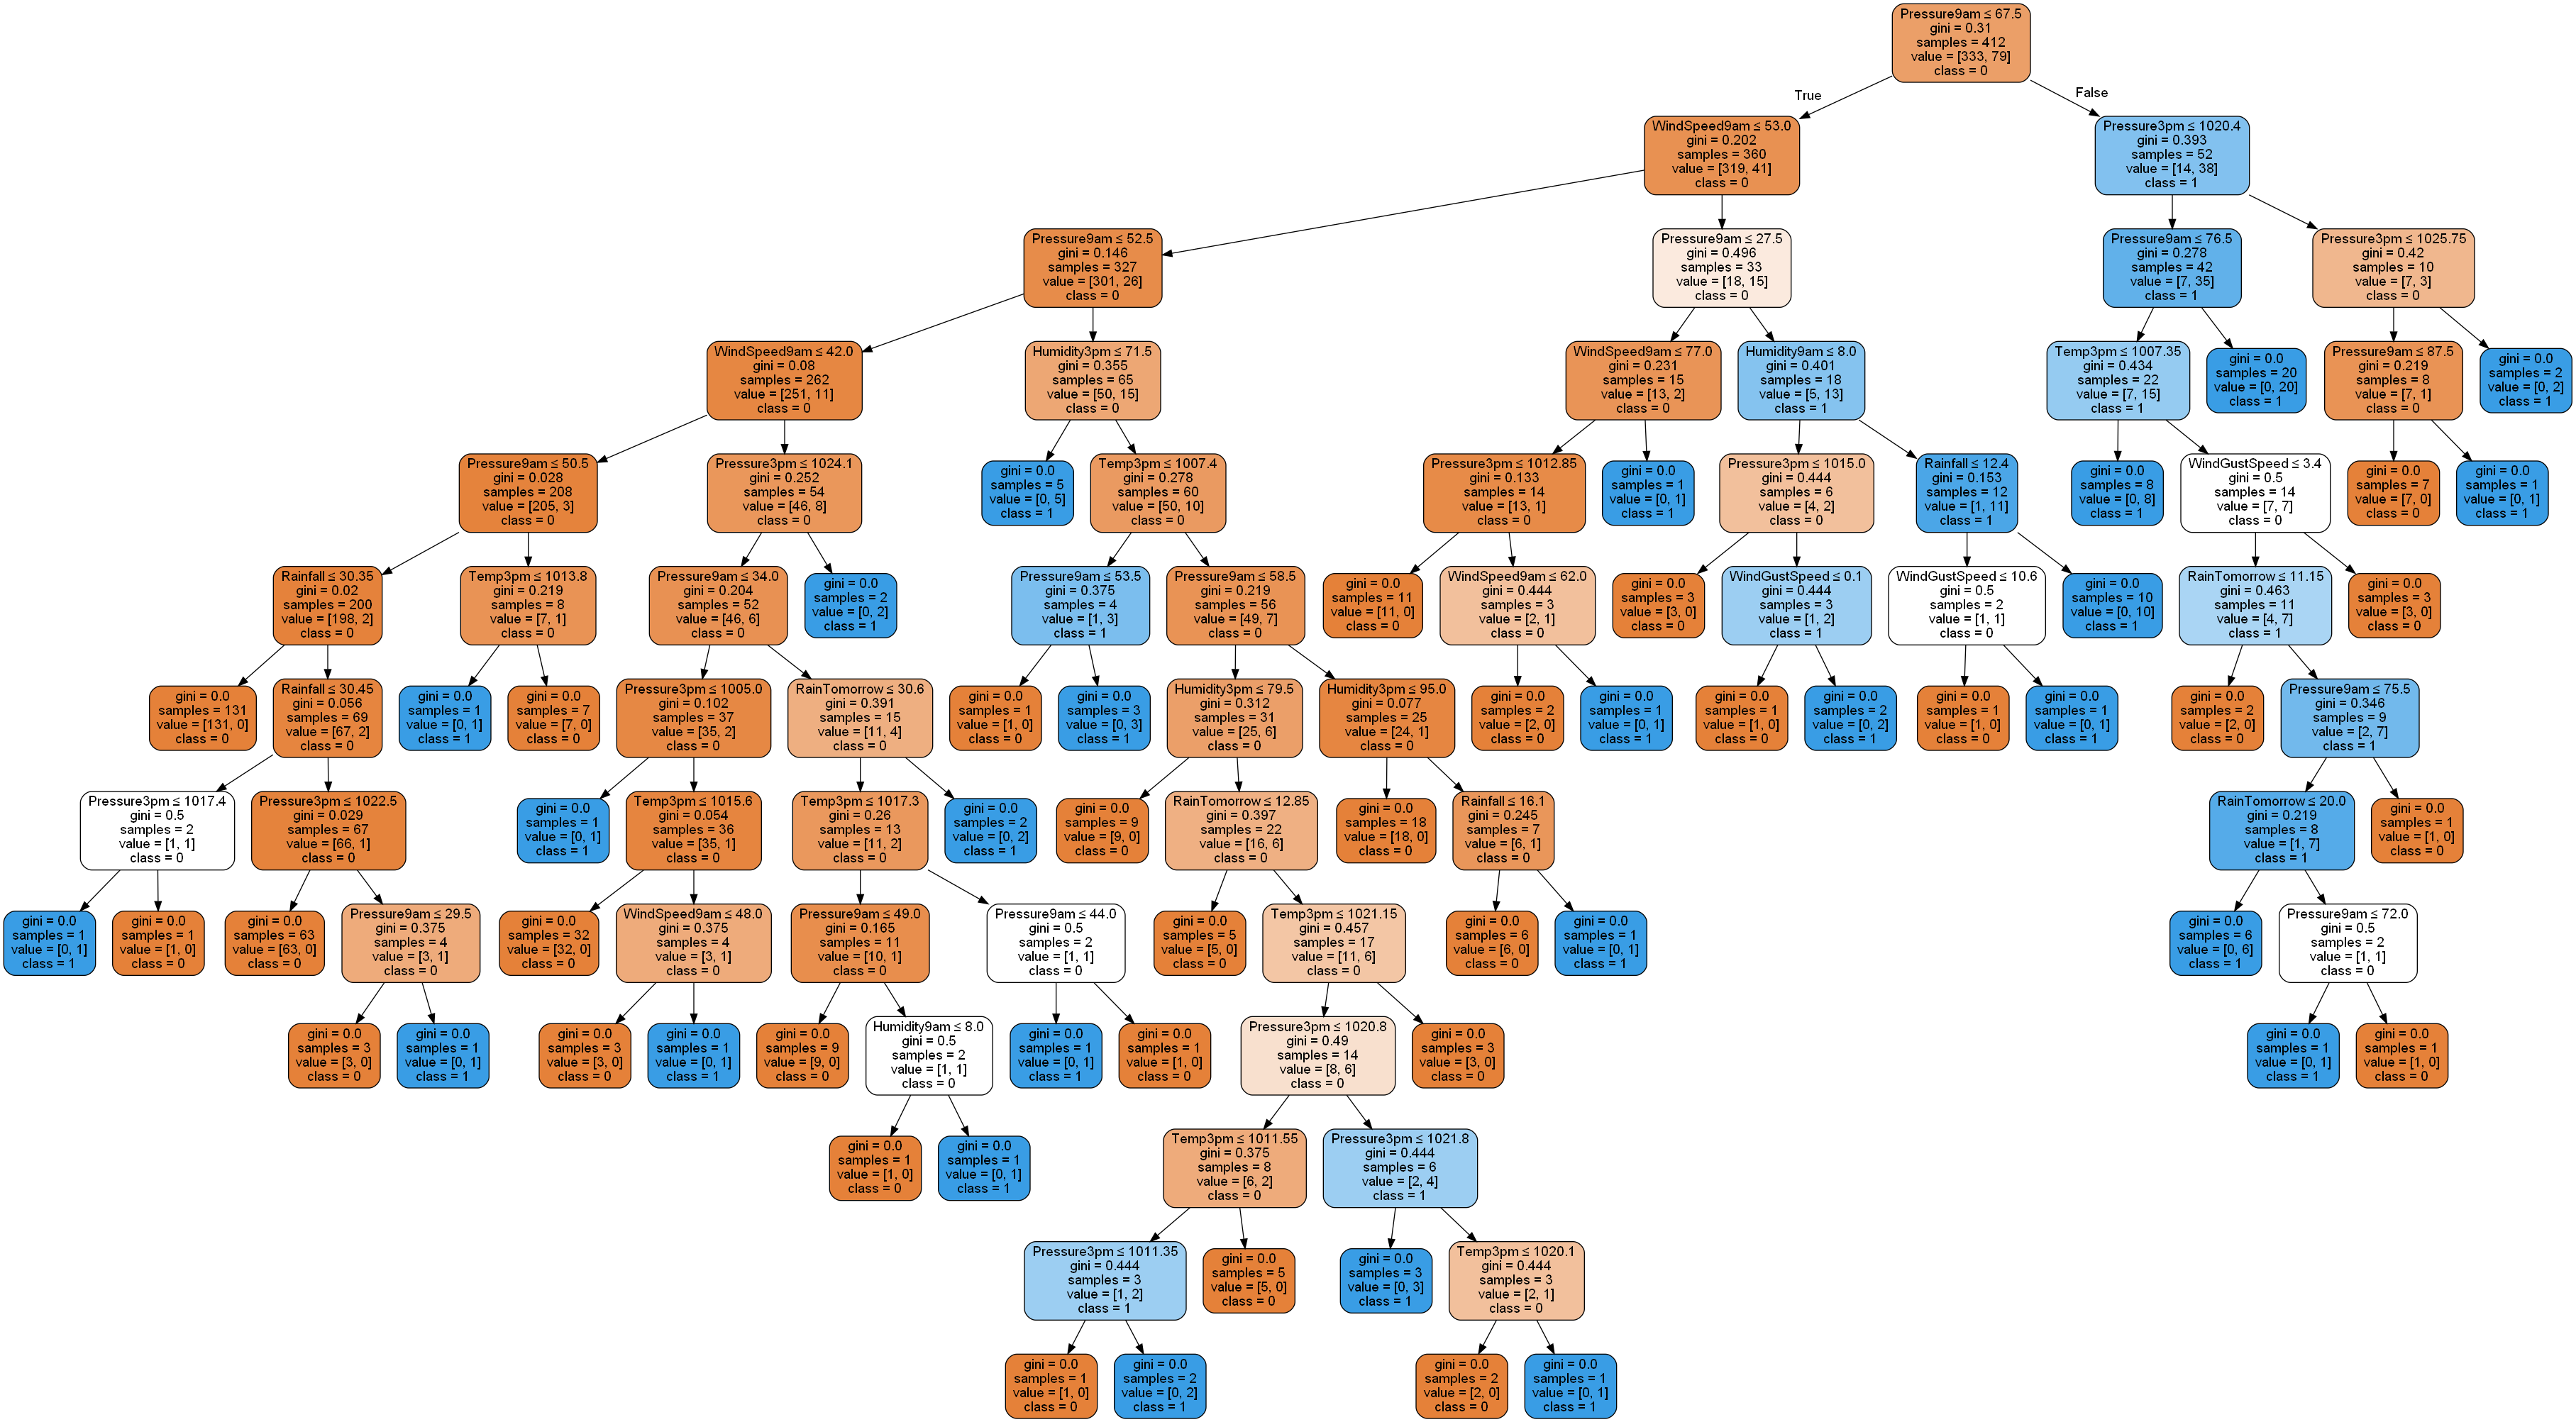

In [117]:
graph.write_png('rain.png')
Image(graph.create_png())

# Logreg

In [118]:
#Metode Holdout with random
x_train17, x_test17, y_train17, y_test17 = train_test_split(x, y, test_size = 0.25)

In [119]:
#Repeated Holdout
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=1000)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train17, x_test17, y_train17, y_test17 = train_test_split(x, y, test_size=0.25)
    clf=clf.fit(x_train17,y_train17)
    y_pred17 = clf.predict(x_test17)
    cm.append((confusion_matrix(y_test17, y_pred17)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi17=np.mean(ac)
spesifisiti17=np.mean(sp)
sensitiviti17=np.mean(se)
print(akurasi17)
print(spesifisiti17)
print(sensitiviti17)

df_k17=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k17=pd.concat([df_k17,pd.DataFrame(test[i])],axis=1)
df_k17.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k17

0.8826086956521738
0.5914813156192468
0.9649164343312379


,Akurasi,Spesitifitas,Sensitivitas
0,0.855072,0.515152,0.961905
1,0.891304,0.655172,0.954128
2,0.869565,0.517241,0.963303
3,0.876812,0.555556,0.954955
4,0.920290,0.714286,0.990291


In [120]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
acc_logreg = round(accuracy_score(y_test17, y_pred17)*100, 2)
auc_logreg = round(roc_auc_score(y_test17, y_pred17, average='micro')*100, 2)
f1_logreg = round(f1_score(y_test17, y_pred17, average='micro')*100, 2)
kb_logreg = pd.DataFrame({
    'Kriteria' : ['Akurasi','Roc Auc Score', 'F1 score'],
    'Score': [acc_logreg, auc_logreg, f1_logreg]})
kb_logreg.sort_values(by='Score', ascending=False)

,Kriteria,Score
0,Akurasi,92.03
2,F1 score,92.03
1,Roc Auc Score,85.23


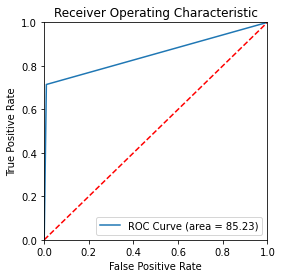

In [121]:
fpr, tpr, threshold = roc_curve(y_test17, y_pred17)

plt. figure(figsize = [4,4])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_logreg)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [122]:
#Metode CV
kf18 = KFold(n_splits=10, shuffle=False)
kf18.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf18.split(y):
    x_train18, x_test18 = x.iloc[train_index], x.iloc[test_index]
    y_train18, y_test18 = y[train_index], y[test_index]

In [123]:
#Metode CV

logreg = LogisticRegression()
logreg.fit(x_train18, y_train18)
y_pred_logreg18 = logreg.predict(x_test18)
acc_logreg2 = round(accuracy_score(y_test18, y_pred_logreg18)*100, 2)
auc_logreg2 = round(roc_auc_score(y_test18, y_pred_logreg18, average='micro')*100, 2)
f1_logreg2 = round(f1_score(y_test18, y_pred_logreg18, average='micro')*100, 2)
kb_logreg2 = pd.DataFrame({
    'Kriteria' : ['Akurasi','Roc Auc Score', 'F1 score'],
    'Score': [acc_logreg2, auc_logreg2, f1_logreg2]})
kb_logreg2.sort_values(by='Score', ascending=False)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Kriteria,Score
0,Akurasi,92.73
2,F1 score,92.73
1,Roc Auc Score,77.78


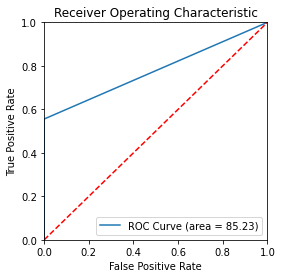

In [124]:
fpr, tpr, threshold = roc_curve(y_test18, y_pred_logreg18)

plt. figure(figsize = [4,4])
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_logreg)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Text(91.68, 0.5, 'predicted label')

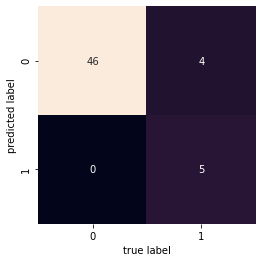

In [125]:
import seaborn as sns
cm_logreg = confusion_matrix(y_test18, y_pred_logreg18)
sns.heatmap(cm_logreg.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

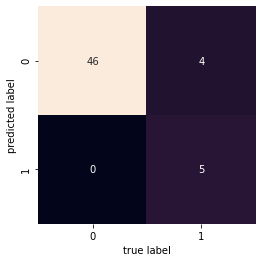

In [126]:
import seaborn as sns
cm_logreg2 = confusion_matrix(y_test18, y_pred_logreg18)
sns.heatmap(cm_logreg2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')